In [56]:
# Essencial Libraries
import pandas as pd
import os
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
file_path = r'C:\Users\erikg\Documents\GitHub\ml-ca1-Erik2021374\spambase_v6.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0,0,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [58]:
# Drop the 'Unnamed: 0' column if it exists
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

df = df.reset_index(drop=True)

In [59]:
#Setting variables of interest
spam = 'is_spam'
flag_spam = df[spam].astype(int)

#Tax of spam in the base
tax_spam = df[spam].mean()
event = df[spam].sum()
non_event = len(df) - event

print(f'There are {event} cases of spam and {non_event} of non events')
print(f'That value creates a tax basis of {tax_spam}')
print(f'So, one event is a spam for each {round(1/tax_spam)} analysed')

There are 1813 cases of spam and 2788 of non events
That value creates a tax basis of 0.39404477287546186
So, one event is a spam for each 3 analysed


In [60]:
print("Dataset Size:", df.shape)
print("\nData Types:")
print(df.dtypes)

Dataset Size: (4601, 58)

Data Types:
word_freq_make                float64
word_freq_address              object
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                  object
word_freq_over                float64
word_freq_remove               object
word_freq_internet             object
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report               object
word_freq_addresses            object
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                  object
word_freq_money               float64
word_freq_hp                  float64
word_freq_hp

In [61]:
# Check for duplicated rows
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

# Check for NaN values per column
print("Number of NaN values per column:\n", df.isna().sum())

# Print total number of NaN values in the entire dataset
total_nans = df.isna().sum().sum()
print(f"\nTotal number of NaN values in dataset: {total_nans}")


Number of duplicate rows: 376
Number of NaN values per column:
 word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650    

In [62]:
# List of object-type columns to check for non-numeric values
object_cols = [
    "word_freq_address", "word_freq_our", "word_freq_remove", "word_freq_internet", 
    "word_freq_report", "word_freq_addresses", "word_freq_000", "word_freq_hpl", 
    "word_freq_labs"
]

# Check for non-numeric values in each object-type column
for col in object_cols:
    non_numeric_values = df[col][~df[col].astype(str).str.match(r'^-?\d+(\.\d+)?$', na=False)]
    if not non_numeric_values.empty:
        print(f"Column '{col}' contains non-numeric values:")
        print(non_numeric_values.unique(), "\n")


Column 'word_freq_address' contains non-numeric values:
['zero'] 

Column 'word_freq_our' contains non-numeric values:
['???'] 

Column 'word_freq_remove' contains non-numeric values:
['?'] 

Column 'word_freq_internet' contains non-numeric values:
[nan '?'] 

Column 'word_freq_report' contains non-numeric values:
['zero'] 

Column 'word_freq_addresses' contains non-numeric values:
[nan 'zero'] 

Column 'word_freq_000' contains non-numeric values:
['???'] 

Column 'word_freq_hpl' contains non-numeric values:
['none'] 

Column 'word_freq_labs' contains non-numeric values:
[nan 'no'] 



In [63]:
# Display percentage of missing values per column, only for columns with missing values
missing_values = (df.isnull().mean() * 100).loc[lambda x: x > 0].sort_values(ascending=False)
print("\nPercentage of missing values per column:")
print(missing_values)


Percentage of missing values per column:
word_freq_labs         5.433601
word_freq_table        0.869376
word_freq_internet     0.326016
word_freq_cs           0.304282
word_freq_addresses    0.195610
word_freq_all          0.130406
word_freq_direct       0.065203
word_freq_3d           0.043469
word_freq_over         0.021734
word_freq_meeting      0.021734
dtype: float64


In [64]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f"Categorical Variables: {categorical_cols}\n")
print(f"Numerical Variables: {numerical_cols}\n")

Categorical Variables: ['word_freq_address', 'word_freq_our', 'word_freq_remove', 'word_freq_internet', 'word_freq_report', 'word_freq_addresses', 'word_freq_000', 'word_freq_hpl', 'word_freq_labs']

Numerical Variables: ['word_freq_make', 'word_freq_all', 'word_freq_3d', 'word_freq_over', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_money', 'word_freq_hp', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_

In [65]:
# Frequency of unique items in categorical variables
if categorical_cols:
    for col in categorical_cols:
        print(f"\nValue Counts for {col}:\n{df[col].value_counts()}\n")
else:
    print("No categorical variables found.\n")


Value Counts for word_freq_address:
word_freq_address
0        3702
14.28      35
0.08       27
0.1        24
0.17       24
         ... 
1.2         1
0.96        1
2.4         1
2.46        1
2.01        1
Name: count, Length: 172, dtype: int64


Value Counts for word_freq_our:
word_freq_our
0       2852
0.36      28
0.32      26
0.19      24
0.8       24
        ... 
2.03       1
1.72       1
2.9        1
1.9        1
1.96       1
Name: count, Length: 256, dtype: int64


Value Counts for word_freq_remove:
word_freq_remove
0       3793
0.08      30
0.05      21
0.5       19
0.32      19
        ... 
0.85       1
0.75       1
2.35       1
2.46       1
0.88       1
Name: count, Length: 174, dtype: int64


Value Counts for word_freq_internet:
word_freq_internet
0       3761
0.05      24
0.18      21
0.32      20
0.1       20
        ... 
0.68       1
1.65       1
2.94       1
0.66       1
?          1
Name: count, Length: 171, dtype: int64


Value Counts for word_freq_report:
word_freq

In [66]:
# Basic statistics for numerical variables
print(f"Basic Statistics for Numerical Variables:\n{df[numerical_cols].describe()}\n")

Basic Statistics for Numerical Variables:
       word_freq_make  word_freq_all  word_freq_3d  word_freq_over  \
count     4601.000000    4595.000000   4599.000000     4600.000000   
mean         0.104553       0.281023      0.065453        0.095922   
std          0.305358       0.504370      1.395454        0.273850   
min          0.000000       0.000000      0.000000        0.000000   
25%          0.000000       0.000000      0.000000        0.000000   
50%          0.000000       0.000000      0.000000        0.000000   
75%          0.000000       0.420000      0.000000        0.000000   
max          4.540000       5.100000     42.810000        5.880000   

       word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  \
count      4601.000000     4601.000000        4601.000000     4601.000000   
mean          0.090067        0.239413           0.059824        0.541702   
std           0.278616        0.644755           0.201545        0.861698   
min           0.000

In [67]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()[:10]}")  # Show first unique values

word_freq_address: ['0.64' '0.28' '0' '0.12' '0.69' '0.42' '0.63' '0.07' '0.68' '0.48']
word_freq_our: ['0.32' '0.14' '1.23' '0.63' '1.85' '1.92' '1.88' '0.61' '0.19' '0']
word_freq_remove: ['0' '0.21' '0.19' '0.31' '0.3' '0.38' '0.96' '0.25' '0.9' '0.42']
word_freq_internet: ['0' '0.07' '0.12' '0.63' '1.85' '1.88' '0.35' nan '0.02' '2.45']
word_freq_report: ['0' '0.21' '0.06' '1.23' '0.23' '0.3' '0.37' '1.26' '1.27' '4.76']
word_freq_addresses: ['0' '0.14' '1.75' '0.12' '0.18' '1.27' nan '0.3' '0.26' '0.03']
word_freq_000: ['0' '0.43' '1.16' '0.19' '0.35' '0.7' '0.31' '0.05' '0.48' '0.3']
word_freq_hpl: ['0' '0.34' '0.05' '1.49' '0.21' '0.39' '0.1' '0.44' '0.51' '0.04']
word_freq_labs: [nan '0.39' '0' '0.06' '0.66' '2.24' '0.24' '3.38' '0.97' '0.86']


In [68]:
# Identify categorical variables (only object types)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Identify categorical variables that can be transformed directly (10 or fewer unique values)
transformable_categorical = [col for col in categorical_cols if df[col].nunique() <= 100000]

# Print the results
print(f"Categorical Variables Suitable for Direct Transformation: {transformable_categorical}\n")


Categorical Variables Suitable for Direct Transformation: ['word_freq_address', 'word_freq_our', 'word_freq_remove', 'word_freq_internet', 'word_freq_report', 'word_freq_addresses', 'word_freq_000', 'word_freq_hpl', 'word_freq_labs']



In [70]:
import numpy as np  # Import NumPy

# Define a function to clean and convert
def safe_convert(val):
    if isinstance(val, str):
        val = val.lower().strip()  # Normalize case and strip spaces
        if val in ["zero"]:  # Replace known non-numeric values
            return 0.0  # Or use np.nan if you prefer missing values
        if val in ["?", "none"]:
            return np.nan  # Use np.nan instead of NaN
    
    try:
        return float(val)  # Convert valid numbers
    except ValueError:
        return np.nan  # Handle unexpected cases

# Convert boolean to integer
df["is_spam"] = df["is_spam"].astype(int)

# Apply the conversion to all object columns
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').applymap(safe_convert)

# Check for NaN values per column
print("Number of NaN values per column:\n", df.isna().sum())

# Print total number of NaN values in the dataset
total_nans = df.isna().sum().sum()
print(f"\nTotal number of NaN values in dataset: {total_nans}")


Number of NaN values per column:
 word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   1
word_freq_over                  1
word_freq_remove                1
word_freq_internet             16
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   1
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   1
word_freq_george                0
word_freq_650                   0
word_freq_lab 

In [71]:
print(df)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

In [55]:
# Print total number of NaN values in the entire dataset
total_nans = df.isna().sum().sum()
print(f"\nTotal number of NaN values in dataset: {total_nans}")


Total number of NaN values in dataset: 344


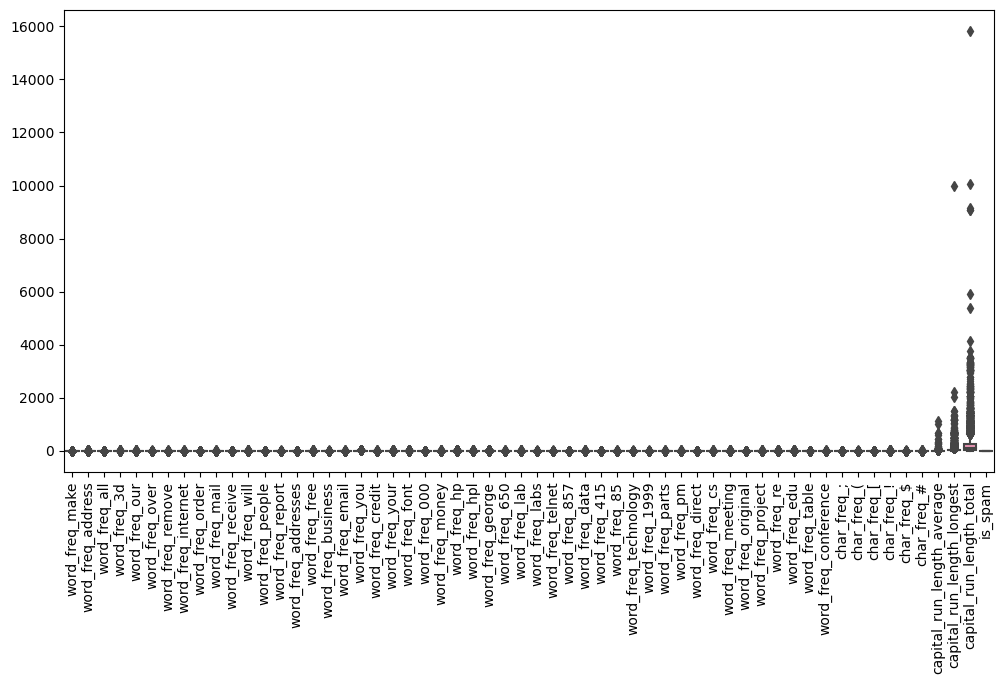

In [72]:
# Plot boxplots to visualize outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate column names if needed
plt.show()

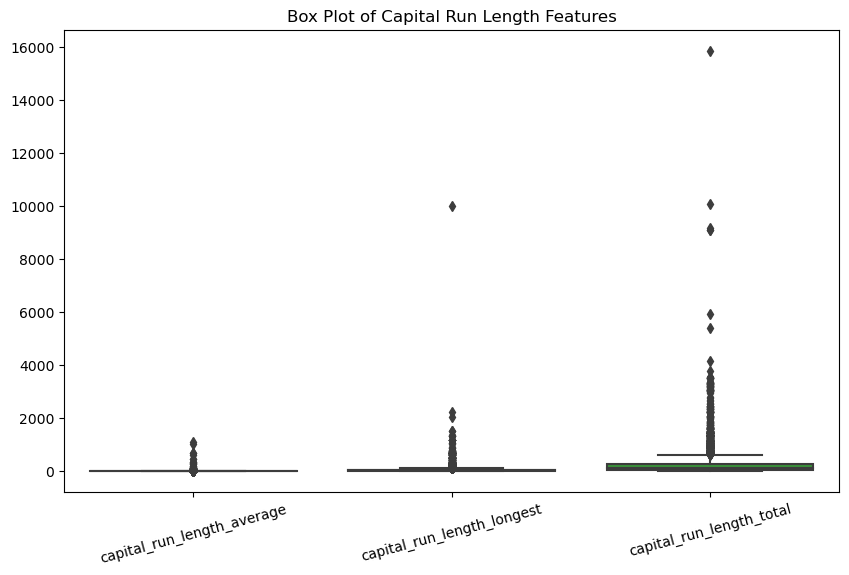

In [77]:
# Define the columns of interest
columns_to_plot = ["capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]

# Set figure size
plt.figure(figsize=(10, 6))

# Create box plot
sns.boxplot(data=df[columns_to_plot])

# Add title
plt.title("Box Plot of Capital Run Length Features")

# Rotate x-axis labels if needed
plt.xticks(rotation=15)

# Show plot
plt.show()

In [73]:
z_scores = np.abs(stats.zscore(df))
outliers_z = (z_scores > 3).sum(axis=0)
print(outliers_z)  # Shows number of outliers per column

word_freq_make                 90
word_freq_address              43
word_freq_all                   0
word_freq_3d                    0
word_freq_our                   0
word_freq_over                  0
word_freq_remove                0
word_freq_internet              0
word_freq_order               113
word_freq_mail                 74
word_freq_receive             100
word_freq_will                102
word_freq_people               89
word_freq_report              106
word_freq_addresses             0
word_freq_free                 69
word_freq_business             97
word_freq_email               106
word_freq_you                  60
word_freq_credit               76
word_freq_your                 87
word_freq_font                 57
word_freq_000                   0
word_freq_money                32
word_freq_hp                   86
word_freq_hpl                   0
word_freq_george              123
word_freq_650                 107
word_freq_lab                  64
word_freq_labs

In [74]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers_iqr)

word_freq_make                1053
word_freq_address              898
word_freq_all                  338
word_freq_3d                    47
word_freq_our                  501
word_freq_over                 999
word_freq_remove               807
word_freq_internet             824
word_freq_order                773
word_freq_mail                 852
word_freq_receive              709
word_freq_will                 270
word_freq_people               852
word_freq_report               357
word_freq_addresses            336
word_freq_free                 957
word_freq_business             963
word_freq_email               1038
word_freq_you                   75
word_freq_credit               424
word_freq_your                 229
word_freq_font                 117
word_freq_000                  679
word_freq_money                735
word_freq_hp                  1090
word_freq_hpl                  811
word_freq_george               780
word_freq_650                  463
word_freq_lab       

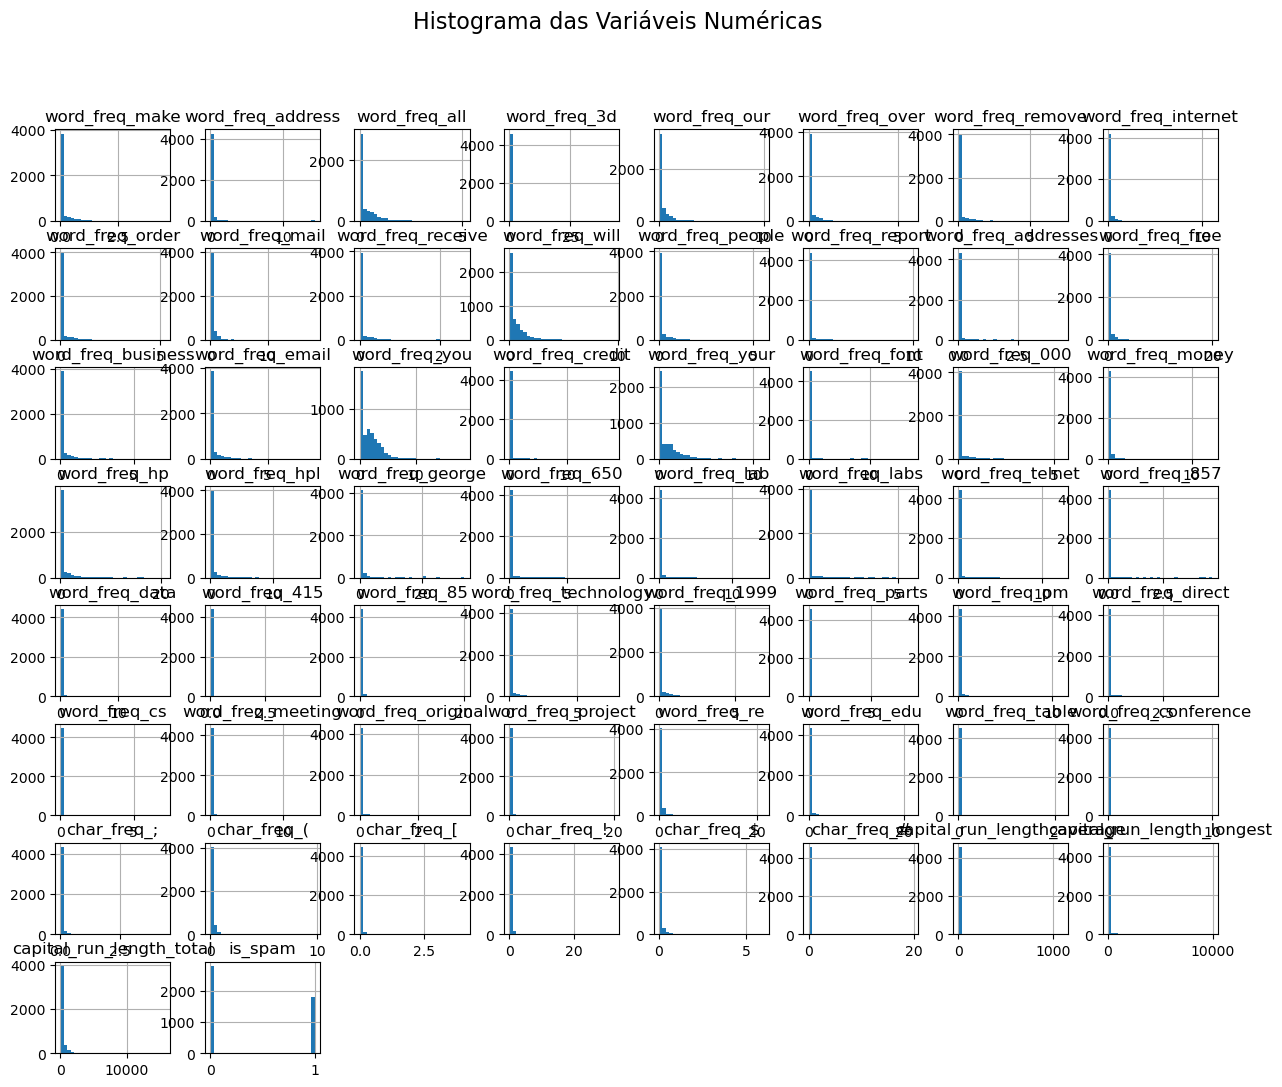

In [75]:
df.hist(figsize=(15, 12), bins=30)
plt.suptitle("Histograma das Variáveis Numéricas", fontsize=16)
plt.show()

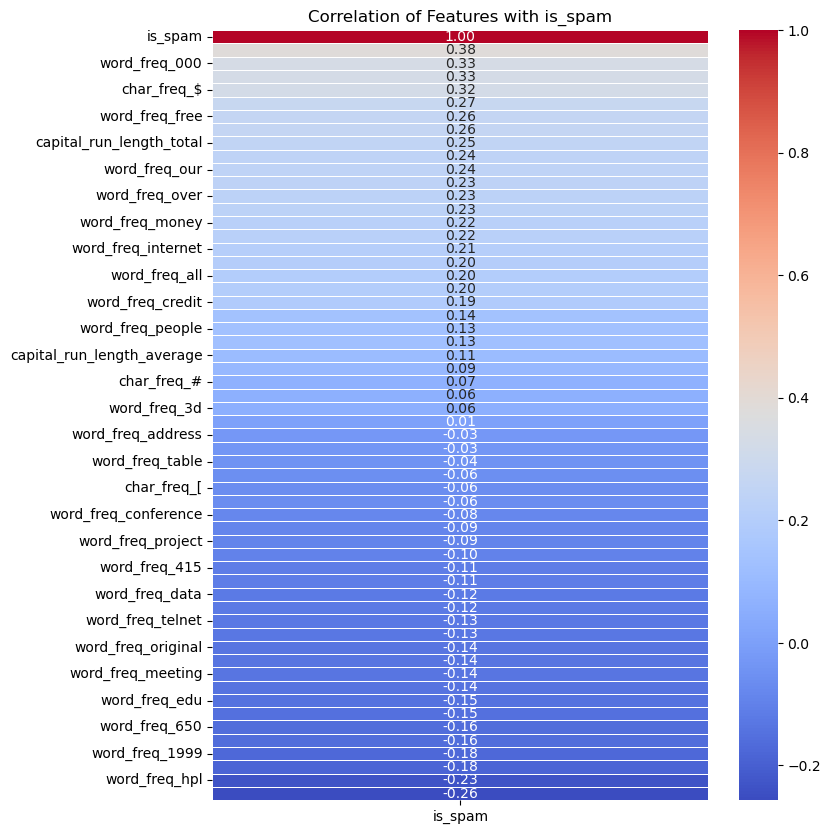

In [76]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Filter correlations only with 'is_spam'
corr_with_target = correlation_matrix[["is_spam"]].sort_values(by="is_spam", ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 10))  # Adjust figure size
sns.heatmap(corr_with_target, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Title
plt.title("Correlation of Features with is_spam")
plt.show()